In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
import matplotlib.pyplot as plt


In [40]:
# Set the random seed for replicated results
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
# Load data
data = pd.read_csv('dataset.csv')


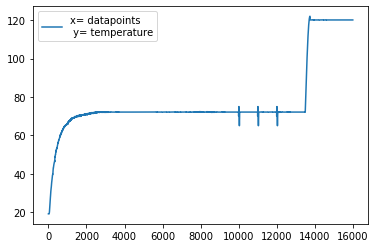

In [42]:
#plot the data 
plt.plot(data,label = 'x= datapoints \n y= temperature')
plt.legend()
plt.show()

In [43]:
# Split data into training and test sets
train_size = int(len(data) * 0.6)
train_data, test_data = data[:train_size], data[train_size:]

In [44]:
# Define the number of time steps
timesteps = 200

In [45]:
# Prepare the training data
train_X = []
for i in range(timesteps, len(train_data)):
    train_X.append(np.array(train_data[i-timesteps:i]).reshape(timesteps, 1))
train_X = np.array(train_X)


In [46]:
# Prepare the test data
test_X = []
for i in range(timesteps, len(test_data)):
    test_X.append(np.array(test_data[i-timesteps:i]).reshape(timesteps, 1))
test_X = np.array(test_X)


In [47]:
# Define the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(None, 1)))
model.add(RepeatVector(1))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')


In [48]:
# Fit the model
history = model.fit(train_X, train_X, epochs=20, batch_size=60, validation_data=(test_X, test_X))


Epoch 1/20
157/157 [==============================] - 22s 140ms/step - loss: nan - val_loss: nan
Epoch 2/20
157/157 [==============================] - 21s 133ms/step - loss: nan - val_loss: nan
Epoch 3/20
157/157 [==============================] - 21s 134ms/step - loss: nan - val_loss: nan
Epoch 4/20
157/157 [==============================] - 21s 134ms/step - loss: nan - val_loss: nan
Epoch 5/20
157/157 [==============================] - 21s 134ms/step - loss: nan - val_loss: nan
Epoch 6/20
157/157 [==============================] - 21s 136ms/step - loss: nan - val_loss: nan
Epoch 7/20
157/157 [==============================] - 21s 133ms/step - loss: nan - val_loss: nan
Epoch 8/20
157/157 [==============================] - 22s 137ms/step - loss: nan - val_loss: nan
Epoch 9/20
157/157 [==============================] - 22s 139ms/step - loss: nan - val_loss: nan
Epoch 10/20
157/157 [==============================] - 22s 139ms/step - loss: nan - val_loss: nan
Epoch 11/20
157/157 [========

In [52]:
# Generate predictions
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

In [53]:
# Calculate the MAE
train_mae = np.mean(np.abs(train_preds - train_X), axis=1)
test_mae = np.mean(np.abs(test_preds - test_X), axis=1)


In [54]:
# Remove NaN values from train and test MAE arrays
train_mae = train_mae[~np.isnan(train_mae)]
test_mae = test_mae[~np.isnan(test_mae)]

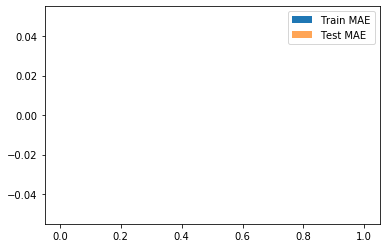

In [55]:
# Plot the histogram of train and test MAE
plt.hist(train_mae, bins='auto', label='Train MAE')
plt.hist(test_mae, bins='auto', alpha=0.7, label='Test MAE')
plt.legend()
plt.show()

In [56]:
# Find the threshold for anomaly detection
threshold = np.mean(train_mae) + np.std(train_mae)
print(f'Threshold: {threshold}')

Threshold: nan


/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/roy/anaconda3/envs/student/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


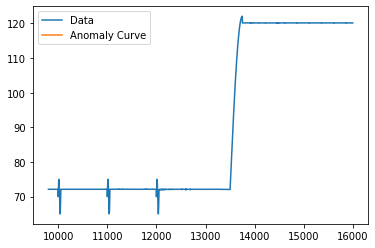

In [57]:
# Generate the anomaly curve and data curve plots
anomaly_curve = np.where(test_mae > threshold, 1, 0)
plt.plot(test_data[timesteps:], label='Data')
plt.plot(anomaly_curve, label='Anomaly Curve')
plt.legend()
plt.show()